In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Second step : First overview on temporal correlation between beers' popularity and major sporting events 

In this notebook, we will start the first part of our analysis work. We will particularly focus on the evolution of the number of ratings and try to find some correlation with the Football World Cup. Then, we will focus on finding some other intersting events to work on. 

In [2]:
beer_advocate = pd.read_csv('Final/beer_advocate.csv')
rate_beer = pd.read_csv('Final/rate_beer.csv')
print(beer_advocate.shape)
print(rate_beer.shape)

(11043, 18)
(12559, 17)


In [3]:
#We filter the columns for better visualization
rate_beer_df = rate_beer[['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates', 'location', 'name']]
beer_advocate_df = beer_advocate[['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates', 'location', 'name']]

In [4]:
rate_beer = rate_beer_df.set_index(["brewery_id", "beer_id"])
beer_advocate= beer_advocate_df.set_index(["brewery_id", "beer_id"])
rate_beer.head()

beer_name  \
brewery_id beer_id                                                      
5973       4580                                 Cave Creek Chili Beer   
           26757                                Cerveza Mexicali Beer   
           82330                           Cerveza Mexicali Dark Beer   
           218798      Dia De Los Muertos Death Becomes You Amber Ale   
           218799   Dia De Los Muertos Death Rides a Pale Horse Bl...   

                                          brewery_name                 style  \
brewery_id beer_id                                                             
5973       4580     Cervecería Mexicana (Grupo Modelo)  Spice/Herb/Vegetable   
           26757    Cervecería Mexicana (Grupo Modelo)            Pale Lager   
           82330    Cervecería Mexicana (Grupo Modelo)    Amber Lager/Vienna   
           218798   Cervecería Mexicana (Grupo Modelo)             Amber Ale   
           218799   Cervecería Mexicana (Grupo Modelo)  Golden Ale/Blond Ale   

                    nbr_ratings   avg  \
brewery_id beer_id                      
5973       4580             851  1.37   
           26757            169  1.95   
           82330            106  2.66   
           218798           175  2.87   
           218799           152  2.67   

                                                                dates  \
brewery_id beer_id                                                      
5973       4580     ['2017-06-22 10:00:00', '2017-05-10 10:00:00',...   
           26757    ['2017-06-20 10:00:00', '2017-05-13 10:00:00',...   
           82330    ['2017-06-19 10:00:00', '2017-05-27 10:00:00',...   
           218798   ['2017-06-27 10:00:00', '2017-06-18 10:00:00',...   
           218799   ['2017-07-22 10:00:00', '2017-06-28 10:00:00',...   

                   location                                name  
brewery_id beer_id                                               
5973       4580      Mexico  Cervecería Mexicana (Grupo Modelo)  
           26757     Mexico  Cervecería Mexicana (Grupo Modelo)  
           82330     Mexico  Cervecería Mexicana (Grupo Modelo)  
           218798    Mexico  Cervecería Mexicana (Grupo Modelo)  
           218799    Mexico  Cervecería Mexicana (Grupo Modelo)

### 1. Global analysis

First of all, we'll gonna check the evolution of the total number of ratings of all the selected beers in the pre-processing part and find some picks which might be correlated to some sporting events. We will therefore try to determine some sporting events which could be related to our dataset.  

In [5]:
final_df = pd.concat([beer_advocate, rate_beer])
final_df.head()

beer_name              brewery_name  \
brewery_id beer_id                                                          
323        4720                Bitter & Twisted  Harviestoun Brewery Ltd.   
           96705                  Ola Dubh 1991  Harviestoun Brewery Ltd.   
           41037    Ola Dubh Special Reserve 12  Harviestoun Brewery Ltd.   
           41012    Ola Dubh Special Reserve 16  Harviestoun Brewery Ltd.   
           47581    Ola Dubh Special Reserve 18  Harviestoun Brewery Ltd.   

                               style  nbr_ratings   avg  \
brewery_id beer_id                                        
323        4720     English Pale Ale          447  3.74   
           96705             Old Ale          109  4.24   
           41037             Old Ale          834  4.13   
           41012             Old Ale          628  4.12   
           47581             Old Ale          457  4.20   

                                                                dates  \
brewery_id beer_id                                                      
323        4720     ['2017-06-04 10:00:00', '2017-05-27 10:00:00',...   
           96705    ['2016-09-10 10:00:00', '2016-08-24 10:00:00',...   
           41037    ['2017-07-24 10:00:00', '2017-07-10 10:00:00',...   
           41012    ['2017-07-12 10:00:00', '2017-06-06 10:00:00',...   
           47581    ['2017-07-24 10:00:00', '2017-07-12 10:00:00',...   

                    location                      name  
brewery_id beer_id                                      
323        4720     Scotland  Harviestoun Brewery Ltd.  
           96705    Scotland  Harviestoun Brewery Ltd.  
           41037    Scotland  Harviestoun Brewery Ltd.  
           41012    Scotland  Harviestoun Brewery Ltd.  
           47581    Scotland  Harviestoun Brewery Ltd.

First, we create functions which we will use to manipulate dates and plot them.

In [6]:
#Transform the list of strings 
final_df['dates'] = final_df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

def extract_dates(list_dates) : 
    """ 
    This function extracts the dates given in parameters into a list we can handle for plotting.
    """
    #put the dates_list element in a single list
    dates_list = [item for sublist in list_dates for item in sublist]

    #For each element of the list, take only the day, month and year
    dates_list = [i[0:10] for i in dates_list]

    #change the type of the dates_list to datetime
    dates_list = pd.to_datetime(dates_list)

    #load the informations in a DataFrame
    dates_df = pd.DataFrame(dates_list, columns=['dates'])
    dates_df['month'] = dates_df['dates'].dt.to_period('M')
    return dates_df

#Extract the dates from all the ratings in a list 
dates_all_ratings = final_df.iloc[:,5].values
dates_df = extract_dates(dates_all_ratings)
dates_df.head()

,dates,month
0,2017-06-04,2017-06
1,2017-05-27,2017-05
2,2017-05-23,2017-05
3,2017-02-10,2017-02
4,2017-01-17,2017-01


Now that we get all the dates of the ratings we have selected in the pre-processing part, we will plot the evolution of the ratings over the time. We have decided to only keep the dates after 2005.

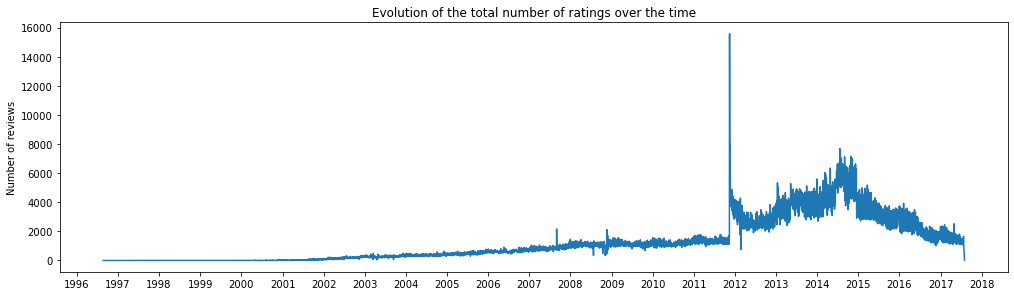

In [7]:
def plot_evolution(dates_count_serie, figsize, title) : 
    formatter = mdates.DateFormatter("%Y") # formatter of the date
    locator = mdates.YearLocator() # where to put the labels

    #plot the number of ratings per day
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    plt.plot(dates_count_serie.index, dates_count_serie.values)
    plt.tight_layout()
    plt.title(title)
    plt.ylabel('Number of reviews')
    plt.show()

#group the dates by month 
dates_count = dates_df.groupby('dates').size()
plot_evolution(dates_count, (14,4), 'Evolution of the total number of ratings over the time')


- First of all, we can see that we have less data before 2012. Hence, we will focus on studying data after this date in order to make more consistent analysis. 
- Then, we can observe of pick in summer 2014. That's a very good thing for us because we wanted to pick the Football World Cup as one of the event to study. The last event whose the date fits in the range of our dataset took place in summer 2014, which is when the number of reviews is the highest. However, we cannot make conclusions right now. Indeed, this peak might come from other reasons and we will check later in our analysis if other major phenomenas happened during this period. <br>

Now, let's zoom in and check this evolution after filteroug out the ratings before 2012. 

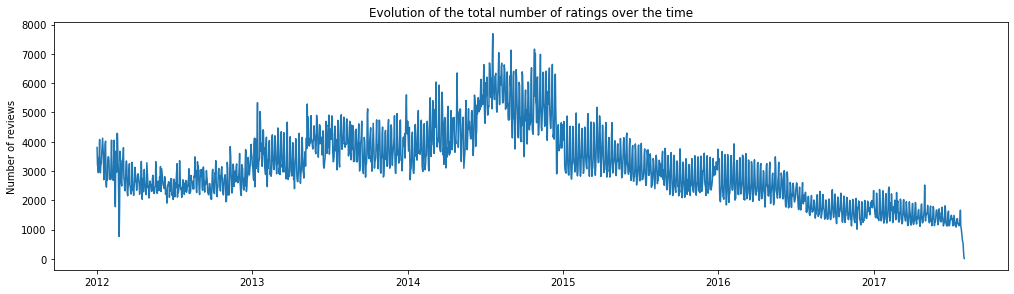

In [8]:
#group the dates by month 
dates_df2 = dates_df.loc[dates_df['dates']>'2012-01-01']
dates_count = dates_df2.groupby('dates').size()
plot_evolution(dates_count, (14,4), 'Evolution of the total number of ratings over the time')

## 2. Study the top 3 breweries

To go deeper into our analysis, we will visualize the evolution over time of the ratings of the top 10 breweries. As mentionned in the previous part, we will first focus on the World Cup 2014 for a first analysis as it seems to be correlated to the number of ratings we have on the two websites. 

In [9]:
#merge the number of ratings per brewery_name
ratings_per_brewery = final_df.groupby('brewery_name')['nbr_ratings'].sum()
ratings_per_brewery.sort_values(ascending=False, axis=0, inplace=True)

#take the top 10 breweries with the most ratings 
top_10_ratings_per_brewery = ratings_per_brewery.head(10)

#create a dataframe
top_10_ratings_per_brewery_df = pd.DataFrame({  'Name' : top_10_ratings_per_brewery.index,
                                                'Counts' : top_10_ratings_per_brewery.values})

top_10_ratings_per_brewery_df

,Name,Counts
0,Stone Brewing,161326
1,Sierra Nevada Brewing Co.,160772
2,Founders Brewing Company,146436
3,Boston Beer Company (Samuel Adams),145810
4,Dogfish Head Brewings & Eats,145222
5,Rogue Ales,113625
6,"Bell's Brewery, Inc.",108191
7,Lagunitas Brewing Company,106721
8,Goose Island Beer Co.,100999
9,3 Floyds Brewing Co.,90180


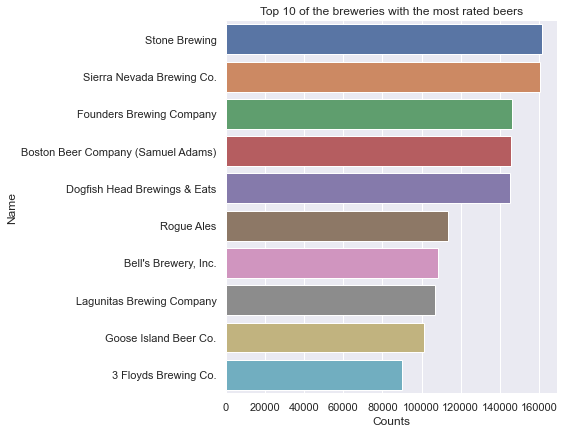

In [10]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x="Counts", y="Name", data=top_10_ratings_per_brewery_df, label="Number of ratings")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.title('Top 10 of the breweries with the most rated beers')
plt.show()

We can see that the top 10 breweries have a very important number of ratings on their beirs (around 160 000 for the two first). We remark also that 5 breweries are dominating the others 5. For this first quick analysis of the data, we will only focus on the two first breweries : 'Stone Brewing' and 'Sierra Nevada Brewing Co'

Let's plot and visualize the evolution of the number of ratings for these two breweries.

In [11]:
df = pd.concat([beer_advocate_df, rate_beer_df])
df['dates'] = df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

#Retrieve the names of the top10 breweries
name_breweries = top_10_ratings_per_brewery_df['Name'].values

#Store in a list a dataframe for each brewery
df_top10_brewery = []

for index, name in enumerate(name_breweries):
    tmp = [name]
    df_tmp = df[df['brewery_name'].isin(tmp)]
    dates_df2 = dates_df.loc[dates_df['dates']>'2012-01-01']

    df_top10_brewery.append(df_tmp)

In [12]:
dates_top10_brewery = []

#For each brewery, we extract the dates
for index, df in enumerate(df_top10_brewery):
    dates_all_ratings = df.iloc[:,7].values
    dates_df = extract_dates(dates_all_ratings)
    dates_top10_brewery.append(dates_df)

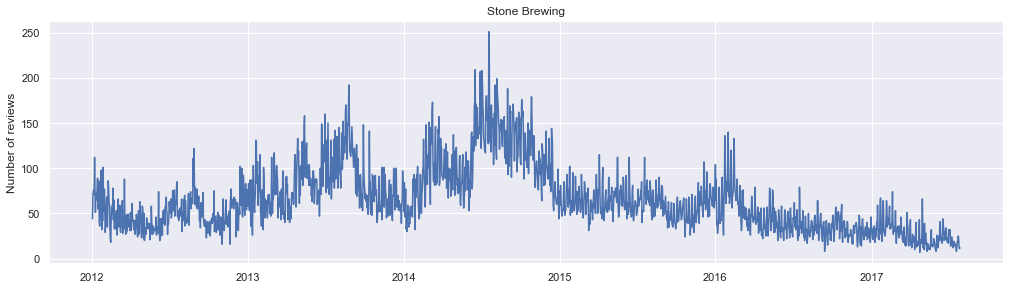

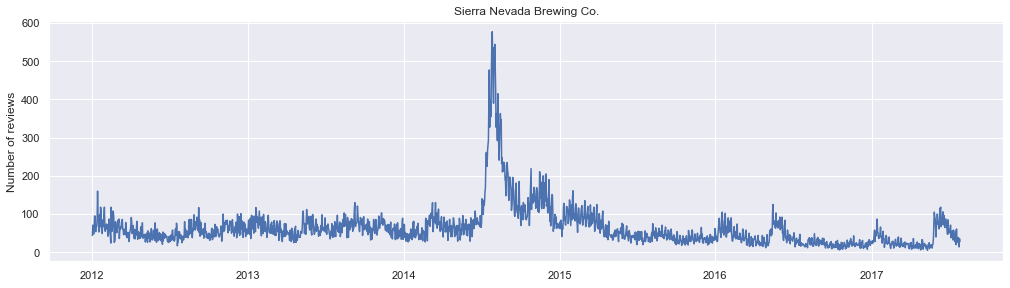

In [13]:
for index, dates_df in enumerate(dates_top10_brewery[:2]):
    dates_df2 = dates_df[dates_df['dates']>'2012-01-01']
    dates_count = dates_df2.groupby('dates').size()
    plot_evolution(dates_count, (14, 4), name_breweries[index])


Both of the breweries have a peak at the same period of the World Cup 2014. It looks very encouraging for the continuation of our project and we will analyse deeper why we have this peak, which is particularly clear for the second brewery. 
<br> Now, let's continue our quick analysis and let's do the same work but with the most rated beers.

## 2. Study the top 10 beers

In [14]:
#merge the number of ratings per brewery_name
ratings_per_beers = final_df.groupby('beer_name')['nbr_ratings'].sum()
ratings_per_beers.sort_values(ascending=False, axis=0, inplace=True)

#take the top 10 breweries with the most ratings 
top_10_ratings_per_beer = ratings_per_beers.head(10)

#create a dataframe
top_10_ratings_per_beer_df = pd.DataFrame({  'Name' : top_10_ratings_per_beer.index,
                                                'Counts' : top_10_ratings_per_beer.values})

top_10_ratings_per_beer_df

,Name,Counts
0,Founders Breakfast Stout,16509
1,90 Minute IPA,15548
2,Arrogant Bastard Ale,14866
3,Pliny The Elder,14436
4,Two Hearted Ale,14305
5,St. Bernardus Abt 12,13997
6,Sculpin IPA,13835
7,Heady Topper,13426
8,Hopslam Ale,13026
9,Founders KBS (Kentucky Breakfast Stout),12599


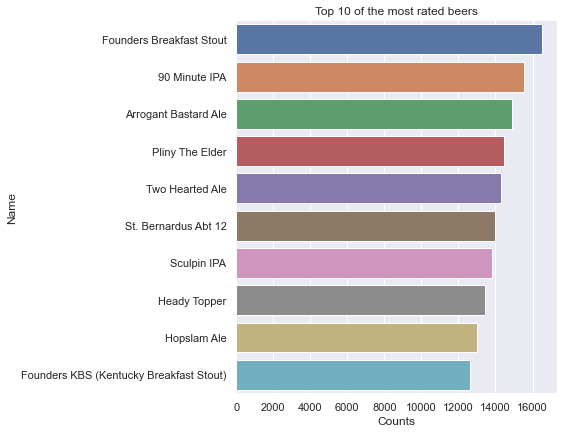

In [15]:
plt.figure(figsize=(8,6))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x="Counts", y="Name", data=top_10_ratings_per_beer_df, label="Number of ratings")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.title('Top 10 of the most rated beers')
plt.show()

We can see here that the most rated beers has around 16 000 ratings, whereas the first brewery has around 160 000 ratings! The number of ratings for each beer in this top 10 ranking is almost the same for the beers. At first insight, it might be less interesting to study the popularity of some beers rather than the breweries. We will check later in details if this first observation is actually true.

In [16]:
df = pd.concat([beer_advocate_df, rate_beer_df])
df['dates'] = df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

In [17]:
#Retrieve the names of the top10 beers
name_beers = top_10_ratings_per_beer_df['Name'].values

#Store in a list a dataframe for each beer
df_top10_beer = []

for index, name in enumerate(name_beers):
    tmp = [name]
    df_tmp = df[df['beer_name'].isin(tmp)]
    dates_df2 = dates_df.loc[dates_df['dates']>'2012-01-01']

    df_top10_beer.append(df_tmp)

In [18]:
dates_top10_beer = []

#For each beer, we extract the dates of the ratings
for index, df in enumerate(df_top10_beer):
    dates_all_ratings = df.iloc[:,7].values
    dates_df = extract_dates(dates_all_ratings)
    dates_top10_beer.append(dates_df)
    

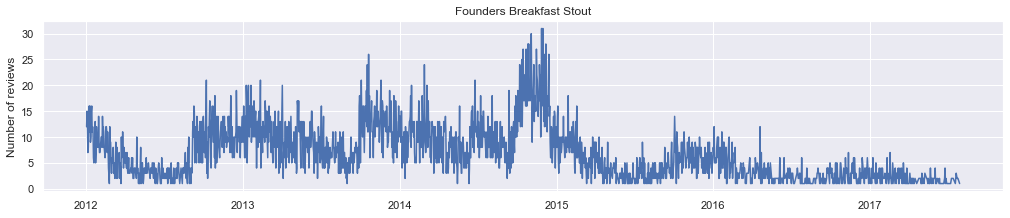

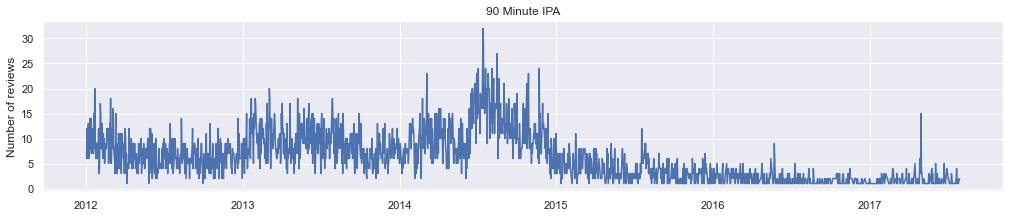

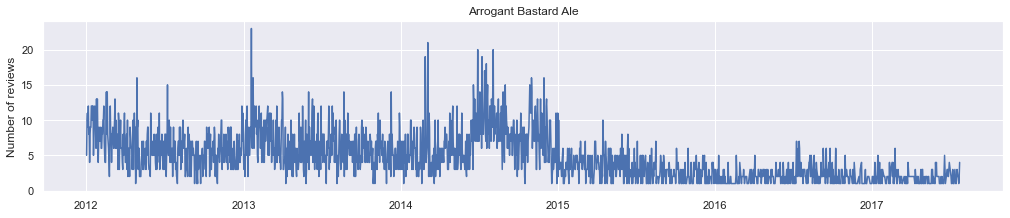

In [19]:
for index, dates_df in enumerate(dates_top10_beer[:3]):
    dates_df2 = dates_df[dates_df['dates']>'2012-01-01']
    dates_count = dates_df2.groupby('dates').size()
    plot_evolution(dates_count, (14, 3), name_beers[index])

These three graphs confirm our previous hypothesis that analysis by beer seems less relevant than analysis by brewery. Indeed, we don't see as important peaks as on the brewery graphs. However, this is only the evolution of 3 beers, which is very small compared to all the beers we have in our dataset! This option should not be left out even if at this stage we are leaning towards studying the popularity of the breweries.

## Find other sport competitions

In [2]:
#import users.csv
rate_beer_users = pd.read_csv('data/RateBeer/users.csv')
beer_advocate_users = pd.read_csv('data/BeerAdvocate/users.csv')

#take only the nbr ratings column and the country column
rate_beer_users = rate_beer_users[['nbr_ratings', 'location']]
beer_advocate_users = beer_advocate_users[['nbr_ratings', 'location']]

#merge the two dataframes
df_countries = pd.concat([rate_beer_users, beer_advocate_users])

#take the top 20 location with the most ratings
locations_ratings = df_countries.groupby('location')['nbr_ratings'].sum().reset_index().sort_values(by='nbr_ratings', ascending=False)
print(locations_ratings.head(10))
print(locations_ratings[locations_ratings['location'] == 'Switzerland'])

                         location  nbr_ratings
192     United States, California       991797
225   United States, Pennsylvania       887782
36                         Canada       821005
200       United States, Illinois       738345
219       United States, New York       641539
48                        Denmark       634707
230          United States, Texas       535324
54                        England       507311
208  United States, Massachusetts       468603
222           United States, Ohio       465203
        location  nbr_ratings
171  Switzerland        36985


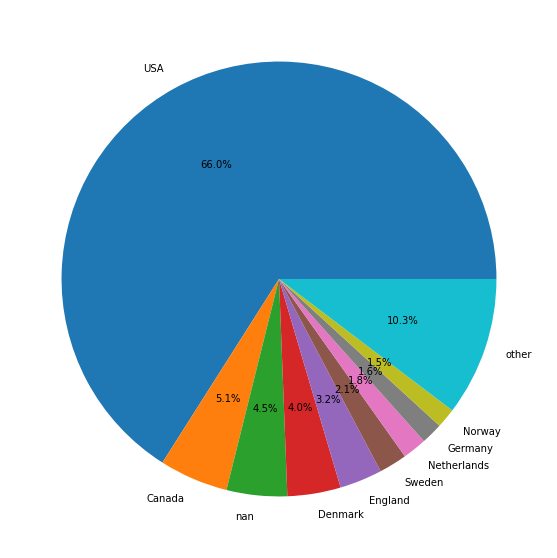

In [3]:
#Replace all the location that start with United States to USA
df_countries['location'] = df_countries['location'].astype(str)
df_countries['location'] = df_countries['location'].apply(lambda x: 'USA' if x.startswith('United States') else x)

locations_ratings = df_countries.groupby('location')['nbr_ratings'].sum().reset_index().sort_values(by='nbr_ratings', ascending=False)

#new df with the top 10 locations all the others are in the other category
top_9_locations = locations_ratings.head(9)
top_10_locations = pd.concat([top_9_locations, pd.DataFrame({'location': ['other'], 'nbr_ratings': [locations_ratings['nbr_ratings'][9:].sum()]})])

plt.figure(figsize=(20,10))
plt.pie(top_10_locations['nbr_ratings'], labels=top_10_locations['location'], autopct='%1.1f%%')
plt.show()

We easily see that most of the ratings came from the United States, we will then change our mindset and analyze american events.

We will focus on these annually events :
- Super Bawl : begin of february 
- NBA finals : May - June
- MLB World Series : End of october - November